In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from scipy.cluster.hierarchy import dendrogram

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix

In [10]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [11]:
df = pd.read_csv("reviews.csv.gz", compression="gzip")

<h1>Data Preperation</h1>

<h2>Initial Exploration</h2>
<p>Getting basic idea of the entire dataset</p>

In [12]:
df.shape

(48136, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f558f6f4978>,
      dtype=object)

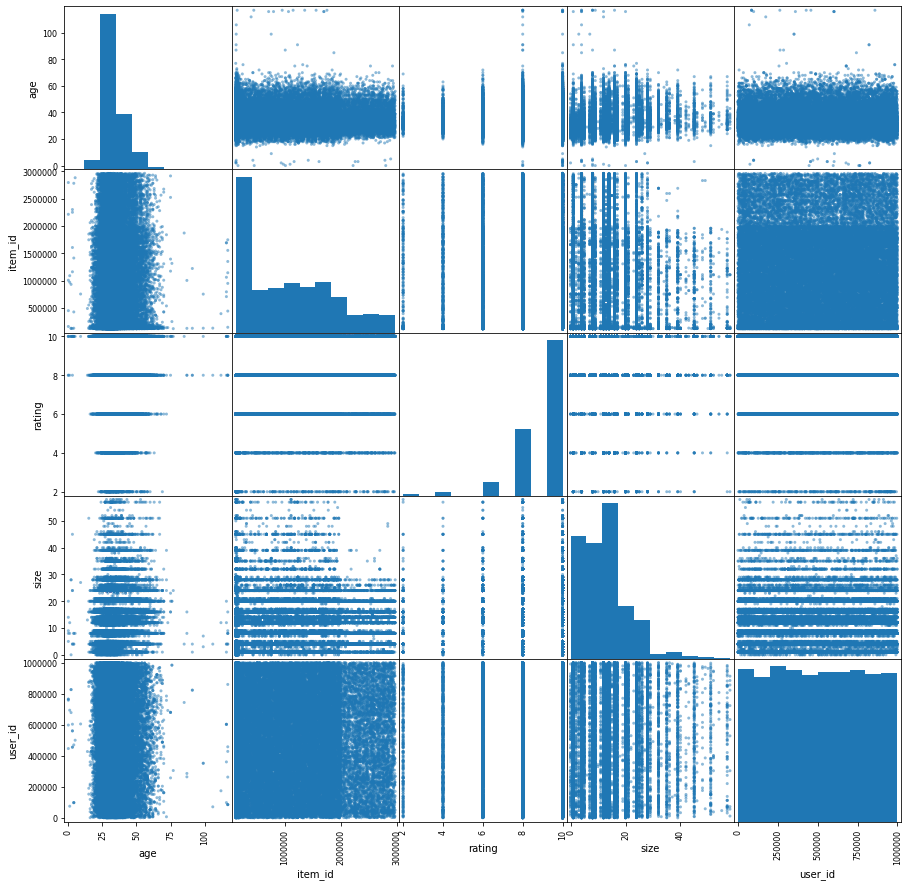

In [13]:
scatter_matrix(df, figsize=(15, 15))

In [14]:
df.describe(include='all')

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
count,47894.000000,44544,43567,48136,48136,47952,4.813600e+04,48116.000000,48133,48136,48136,48136,48136.000000,48136.000000,40594
unique,NaN,7,95,62,3,24,NaN,NaN,8,2120,41417,47935,NaN,NaN,173
top,NaN,hourglass,34b,dress,fit,"5' 4""",NaN,NaN,wedding,"June 15, 2016",b'Stylist Review',b'.',NaN,NaN,130lbs
freq,NaN,13887,6732,23179,35430,7100,NaN,NaN,14411,208,230,18,NaN,NaN,3576
mean,33.866580,NaN,NaN,NaN,NaN,NaN,1.043875e+06,9.084255,NaN,NaN,NaN,NaN,12.248255,499091.944470,NaN
std,8.018446,NaN,NaN,NaN,NaN,NaN,8.067556e+05,1.436092,NaN,NaN,NaN,NaN,8.523070,288853.095706,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.233730e+05,2.000000,NaN,NaN,NaN,NaN,0.000000,47.000000,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,1.941820e+05,8.000000,NaN,NaN,NaN,NaN,8.000000,249516.000000,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,9.458800e+05,10.000000,NaN,NaN,NaN,NaN,12.000000,498811.000000,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,1.678888e+06,10.000000,NaN,NaN,NaN,NaN,16.000000,749178.750000,NaN


In [18]:
df['fit'][30:40]

30      fit
31      fit
32    large
33      fit
34      fit
35      fit
36    small
37      fit
38      fit
39    large
Name: fit, dtype: object

In [20]:
# https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

# This article shows how to detect anomalies

In [13]:
df.count()

age               47894
body type         44544
bust size         43567
category          48136
fit               48136
height            47952
item_id           48136
rating            48116
rented for        48133
review_date       48136
review_summary    48136
review_text       48136
size              48136
user_id           48136
weight            40594
dtype: int64

In [14]:
df_without_na = df.dropna()

In [15]:
df_without_na.shape

(36677, 15)

In [16]:
df.shape

(48136, 15)

In [17]:
df_without_na.count()

age               36677
body type         36677
bust size         36677
category          36677
fit               36677
height            36677
item_id           36677
rating            36677
rented for        36677
review_date       36677
review_summary    36677
review_text       36677
size              36677
user_id           36677
weight            36677
dtype: int64

In [18]:
rows_lost = df['age'].count() - df_without_na['age'].count()

In [19]:
rows_lost

11217

In [20]:
df.dtypes

age               float64
body type          object
bust size          object
category           object
fit                object
height             object
item_id             int64
rating            float64
rented for         object
review_date        object
review_summary     object
review_text        object
size                int64
user_id             int64
weight             object
dtype: object

In [21]:
(df['rating'] == '?').sum()

0

In [22]:
df['body type']

0         athletic
1        full bust
2         athletic
3         athletic
4        full bust
           ...    
48131     athletic
48132         pear
48133         pear
48134         pear
48135    hourglass
Name: body type, Length: 48136, dtype: object

In [23]:
df['height']

0        5' 6"
1        5' 6"
2        5' 5"
3        5' 2"
4        5' 3"
         ...  
48131    5' 4"
48132    5' 7"
48133    5' 6"
48134    5' 7"
48135    6' 1"
Name: height, Length: 48136, dtype: object

In [24]:
df['rating']

0        10.0
1        10.0
2         8.0
3        10.0
4        10.0
         ... 
48131     8.0
48132     8.0
48133    10.0
48134    10.0
48135    10.0
Name: rating, Length: 48136, dtype: float64

In [25]:
df.isnull().sum()

age                242
body type         3592
bust size         4569
category             0
fit                  0
height             184
item_id              0
rating              20
rented for           3
review_date          0
review_summary       0
review_text          0
size                 0
user_id              0
weight            7542
dtype: int64

In [26]:
nan_rating = df[df['rating'].isnull()]

In [27]:
nan_rating

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
3208,30.0,hourglass,36d,dress,fit,"5' 5""",195124,NaN,party,"August 29, 2012","b""I got tons of compliments and felt really HO...","b""I loved the print on this dress. I wore it t...",14,222028,135lbs
4582,56.0,full bust,36d+,dress,fit,"5' 4""",126335,NaN,wedding,"August 13, 2012",b'Sparkling!',b'This dress was a big hit at the wedding I at...,20,615326,NaN
6729,36.0,pear,36c,gown,fit,"5' 8""",145906,NaN,wedding,"August 29, 2012",b'Everyone told me I looked gorgeous and asked...,b'I got so many compliments on this dress and ...,25,111595,NaN
7014,36.0,hourglass,32c,gown,fit,"5' 6""",139086,NaN,wedding,"May 13, 2012",b'I looked Stunning',"b'I loved this dress, it was very comfy and fi...",8,501189,118lbs
7542,38.0,athletic,NaN,gown,fit,"5' 6""",140321,NaN,formal affair,"August 12, 2012",b'Just Gorgeous!!',b'I wore this dress to a formal Christmas part...,12,793981,135lbs
7962,39.0,hourglass,NaN,gown,large,"5' 4""",139086,NaN,formal affair,"August 9, 2012",b'Gorgeous but too big',"b'I rented this for a formal event, but it was...",12,541428,NaN
14706,33.0,pear,32d+,dress,fit,"5' 7""",130259,NaN,wedding,"August 24, 2012",b'Exactly as pictured ',"b""This dress was gorgeous but I couldn't wear ...",12,863788,135lbs
16864,30.0,hourglass,36d,gown,fit,"5' 4""",145906,NaN,wedding,"August 14, 2012",b' ',b'It was very pretty and perfect for a black t...,8,762073,NaN
22834,39.0,hourglass,NaN,gown,large,"5' 4""",139086,NaN,formal affair,"August 9, 2012",b'Gorgeous but too big',"b'I rented this for a formal event, but it was...",12,541428,NaN
25242,33.0,hourglass,34c,gown,fit,"5' 7""",140321,NaN,formal affair,"August 15, 2012",b'Amazing dress!',b'I absolutely loved this dress! I was a litt...,21,636811,155lbs


<h2>Objective: Checking for outliers in regards to Age/Size</h2>

In [28]:
df['age'].min()

0.0

In [29]:
df.nsmallest(10, 'age')

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
2721,0.0,hourglass,34a,dress,fit,"5' 8""",1009409,10.0,wedding,"October 29, 2017",b'Fit well and comfortable. ',b'Fits true to size ',14,764422,130lbs
6523,0.0,hourglass,34a,top,fit,"5' 8""",2797877,8.0,date,"November 14, 2017","b'Lovely material, so soft and silky. I got a ...",b'The collar is too tight so I left the top bu...,8,764422,130lbs
25489,0.0,hourglass,36b,jumpsuit,fit,"5' 3""",2215805,8.0,wedding,"October 25, 2017",b'Amazing!',"b""Fit was great, I loved how this looked. got ...",20,446403,155lbs
27835,0.0,straight & narrow,34b,gown,fit,"5' 7""",163328,10.0,formal affair,"December 10, 2012",b'Gorgeous. Glam. Sexy.',b'Absolutely loved this dress \xe2\x80\x93 wor...,5,597639,125lbs
46611,0.0,athletic,32b,dress,large,"5' 8""",452942,10.0,wedding,"November 28, 2017",b'Best combination of stunning and comfort!',b'This dress was amazing! I can usually wear a...,9,757511,135lbs
14697,1.0,pear,36a,dress,fit,"5' 4""",1092231,10.0,party,"October 9, 2016",b'Great dress. Very comfortable',"b""I wore this dress to my God Daughter's chris...",12,75230,143lbs
26411,1.0,NaN,NaN,dress,fit,"5' 7""",972048,8.0,work,"August 24, 2016",b'Classic Work Dress',b'Great work dress. I paired with a blazer to ...,8,693205,NaN
18216,2.0,pear,36c,shirtdress,fit,"5' 10""",933691,10.0,party,"June 23, 2016",b'Love the pockets!',"b""This dress was great for a summer wedding sh...",28,825986,180lbs
18984,2.0,pear,36c,gown,fit,"5' 10""",131533,10.0,wedding,"June 23, 2016",b'Great dress to dance in!',b'I wore this dress to a semi-formal wedding a...,28,825986,180lbs
20122,2.0,petite,32c,gown,fit,"5' 4""",125465,10.0,wedding,"July 16, 2015",b'Compliments all night. Felt comfortable and ...,"b'Ordered 0P and 2P, and 0P fit perfectly (did...",0,677966,110lbs


In [30]:
df['size'].max()

58

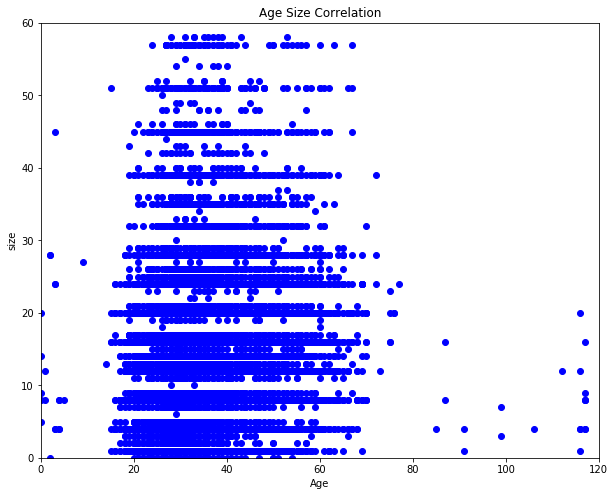

In [31]:
age = df['age']
size = df['size']

fig = plt.figure(figsize=(10,8))
plt.title("Age Size Correlation")
plt.scatter(age, size, color = "blue", marker="o")
plt.xlabel("Age")
plt.xlim(0, 120)
plt.ylabel("size")
plt.ylim(0, 60)
plt.show()

<h2>Result: Outliers are present and must be removed</h2>
<p>
    Ages less than 10 seem to be incorrect values. Ages greater than 80 with sizes less than 8 seem unlikely too if not impossible.
</p>

<h2>Objective: Check for strong correlation between Size and Weight</h2>
<p>
    There are too many missing fields in the weight column for it to be 
    useful. I'm going to check if there is a strong enough correlation
    between size and weight so as to justify dropping the weight column, as it 
    will not be needed.
</p>

In [104]:
df['weight'].isnull().sum()

7372

In [105]:
test_df = df.copy(deep=True)

In [106]:
test_df.dropna(subset=["weight"], inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [107]:
test_df.weight = test_df.weight.apply(lambda x: x.replace('lbs', ''))

In [108]:
test_df.weight

0        140
1        128
2        132
3        125
4        150
        ... 
40496    125
40497    155
40498    125
40499    133
40500    210
Name: weight, Length: 40501, dtype: object

In [109]:
test_df['weight'] = pd.to_numeric(test_df['weight'])

In [110]:
test_df.dtypes

age               float64
body type          object
bust size          object
category           object
fit                object
height             object
item_id             int64
rating            float64
rented for         object
review_date        object
review_summary     object
review_text        object
size                int64
user_id             int64
weight              int64
dtype: object

In [39]:
test_df['weight'].max()

290

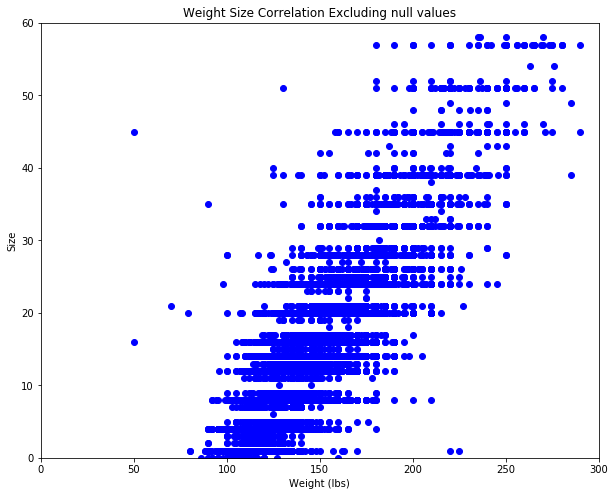

In [40]:
weight = test_df['weight']
size = test_df['size']

fig = plt.figure(figsize=(10,8))
plt.title("Weight Size Correlation Excluding null values")
plt.scatter(weight, size, color = "blue", marker="o")
plt.xlabel("Weight (lbs)")
plt.xlim(0, 300)
plt.ylabel("Size")
plt.ylim(0, 60)
plt.show()

In [ ]:
weight = test_df['weight']
size = test_df['size']

fig = plt.figure(figsize=(10,8))
plt.title("Weight Size Correlation Excluding null values")
plt.scatter(weight, size, color = "blue", marker="o")
plt.xlabel("Weight (lbs)")
plt.xlim(0, 300)
plt.ylabel("Size")
plt.ylim(0, 60)
plt.show()

In [120]:
test_df = test_df[(test_df['weight'] > 110) | ((test_df['size']))]

KeyError: '[False False False ... False False False] not found in axis'

In [41]:
test_df['weight'].corr(test_df['size'])

0.8496749753119235

<h2>Result: There seems to be a strong correlation.</h2>
<p>
    What can be seen from the graph above, is that there is a clear correlation between weight and sizes of dresses. While this assumption can be made using common sense, I said I'd prove it to make sure.</p>
<p>
    Another piece of information that could be extracted, is that there are much more values in the 10-30 size range, in comparison to the 30-60 range. One reason for this is that less people in general are of these sizes. Another reason however, could be because people of higher sizes/weights, are more likely to leave this field empty as a result of various insecurity reasons.
</p>

<h2>Objective: Investigation of Size values in dataset</h2>
<p>From quick research, it seems there are 2 types of size measurement. UK and EU versions. From looking at the dataset, it seems there may be a mix between the 2. Below are attempts to find a solution to this problem.
</p>
<p>
    Potential Solutions: Maybe EU sized people rate the site worse.
</p>

In [80]:
df['size'].isnull().sum()

0

In [81]:
df.shape

(48136, 15)

In [44]:
df['size'].describe(include='all')

count    48136.000000
mean        12.248255
std          8.523070
min          0.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         58.000000
Name: size, dtype: float64

<h2>Objective: Removing Impossible Age values</h2>
<p>
    Checking to see if there are age ranges that could not be valid with the rest of the row data. Eg. people < 10
    years of age but also 5 foot 8                                                                                            
</p>

In [129]:
df[(df['age'] <= 10)].sum()

age                                                              53
category          dresstopgownjumpsuitdressdressshirtdressgowngo...
fit               fitfitfitfitfitfitfitfitfitfitfitfitfitfitfitf...
height            5' 8"5' 8"5' 3"5' 6"5' 4"5' 5"5' 10"5' 10"5' 4...
item_id                                                    25752975
rating                                                          202
rented for        weddingdateformal affairweddingpartyformal aff...
review_date       October 29, 2017November 14, 2017June 11, 2017...
review_summary    b'Fit well and comfortable. 'b'Lovely material...
review_text       b'Fits true to size 'b'The collar is too tight...
size                                                            292
user_id                                                    10932382
dtype: object

(0, 18000)

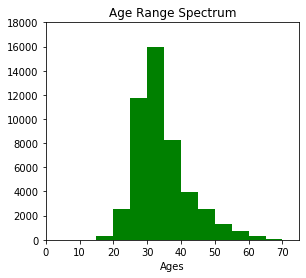

In [58]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Age Range Spectrum")
plt.hist(df['age'], bins = range(0,110,5), color='green')
plt.xlabel('Ages')
plt.xlim(0,75)
plt.ylim(0,18000)


In [61]:
df.count()

age               47894
body type         44544
bust size         43567
category          48136
fit               48136
height            47952
item_id           48136
rating            48116
rented for        48133
review_date       48136
review_summary    48136
review_text       48136
size              48136
user_id           48136
weight            40594
dtype: int64

In [130]:
df = (df[df['age'] > 10.0]).copy()
df.reset_index(drop=True, inplace=True)
df.shape

(47873, 15)

In [83]:
df[df['age'] < 10]

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight


In [13]:
df[df['body type'].isnull() & df['weight'].isnull() & df['bust size'].isnull()].count()

age               514
body type           0
bust size           0
category          514
fit               514
height            514
item_id           514
rating            514
rented for        514
review_date       514
review_summary    514
review_text       514
size              514
user_id           514
weight              0
dtype: int64

(0, 200)

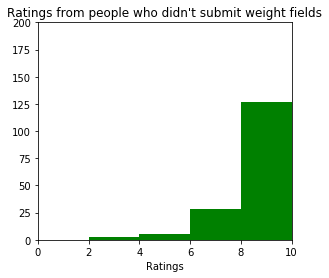

In [102]:
df_wo_weight_vals = df[df['body type'].isnull() & df['weight'].isnull() & df['bust size'].isnull()]

fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Ratings from people who didn't submit weight fields")
plt.hist(df_wo_weight_vals['rating'], bins = range(0,110,2), color='green')
plt.xlabel('Ratings')
plt.xlim(0,10)
plt.ylim(0,200)

<h2>Observation:</h2>
<p>
    There appears to be no direct reason for people not entering their weight related fields. There could have been a case for saying the reason for not filling it out is due to disliking the dresses. However, this is not the case as shown in the graph above.
</p>

In [113]:
df['bust size']

0        32ddd/e
1            36d
2            34b
3            38b
4            34c
          ...   
47868        32c
47869        34b
47870        32b
47871        34c
47872        38d
Name: bust size, Length: 47873, dtype: object

In [115]:
df['rating'].describe(include='all')

count    47853.000000
mean         9.083276
std          1.436856
min          2.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [116]:
df.describe(include='all')

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
count,47873.000000,44428,43322,47873,47873,47692,4.787300e+04,47853.000000,47870,47873,47873,47873,47873.000000,47873.000000,40501
unique,NaN,7,95,62,3,24,NaN,NaN,8,2119,41192,47672,NaN,NaN,173
top,NaN,hourglass,34b,dress,fit,"5' 4""",NaN,NaN,wedding,"June 15, 2016",b'Stylist Review',b'.',NaN,NaN,130lbs
freq,NaN,13851,6706,23072,35223,7061,NaN,NaN,14329,208,230,18,NaN,NaN,3569
mean,33.880329,NaN,NaN,NaN,NaN,NaN,1.043313e+06,9.083276,NaN,NaN,NaN,NaN,12.241681,499109.354772,NaN
std,7.993158,NaN,NaN,NaN,NaN,NaN,8.064590e+05,1.436856,NaN,NaN,NaN,NaN,8.514833,288826.260920,NaN
min,14.000000,NaN,NaN,NaN,NaN,NaN,1.233730e+05,2.000000,NaN,NaN,NaN,NaN,0.000000,47.000000,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,1.941820e+05,8.000000,NaN,NaN,NaN,NaN,8.000000,249550.000000,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,9.458800e+05,10.000000,NaN,NaN,NaN,NaN,12.000000,498694.000000,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,1.678888e+06,10.000000,NaN,NaN,NaN,NaN,16.000000,749254.000000,NaN


<h2>Objective: Remove Null Rating Values</h2>
<p>
    Remove the null rating values as this result is what we're basing our Learning algorithm off. We should not fill this value with the average because our algorithm must learn off true values. There is no point making it learn from answers that may not necessarily be correct.
</p>

In [144]:
df.shape

(47873, 15)

In [146]:
df.dropna(subset=["rating"], inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape

(47853, 15)

In [147]:
df['rating'].isnull().sum()

0

In [154]:
df.dtypes

age               float64
body type          object
bust size          object
category           object
fit                object
height             object
item_id             int64
rating            float64
rented for         object
review_date        object
review_summary     object
review_text        object
size                int64
user_id             int64
weight             object
dtype: object

<h1>Creating Learning Algorithm</h1>

In [157]:
numeric_features = ['age', 'item_id', 'size']
nominal_features = ['body type', 'bust size', 'category', 'fit', 'height', 'rented for', 'review_date', 'review_summary', 'review_text', 'weight']

preprocessor = ColumnTransformer([
        ("num", StandardScaler(), numeric_features),
        ("nom", OneHotEncoder(handle_unknown="ignore"), nominal_features)], 
        remainder="drop")

# Create a pipeline that combines the preprocessor with the estimator
pipeline = Pipeline([
    ("pre", preprocessor),
    ("est", LinearRegression())])

y = df["rating"].values

In [158]:
cross_val_score(pipeline, df, y, scoring="neg_mean_absolute_error", cv=10)

ValueError: Input contains NaN